# Analyse du data

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/12 11:13:33 WARN Utils: Your hostname, DESKTOP-3IKPR1U, resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
26/01/12 11:13:33 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/12 11:13:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# loading data
df = spark.read.parquet("/mnt/c/Users/hp/Desktop/Urban-ETA-ML-Platform/data/dataset.parquet")
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [3]:
#  data types
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)



In [4]:

df.columns

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'cbd_congestion_fee']

In [5]:
df.describe().show()

26/01/12 11:14:10 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+------------------+--------------------+-------------------+-------------------+
|summary|          VendorID|   passenger_count|    trip_distance|       RatecodeID|store_and_fwd_flag|     PULocationID|      DOLocationID|      payment_type|       fare_amount|             extra|            mta_tax|        tip_amount|       tolls_amount|improvement_surcharge|      total_amount|congestion_surcharge|        Airport_fee| cbd_congestion_fee|
+-------+------------------+------------------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+---------------------+-------

In [6]:
from pyspark.sql.functions import col, sum as spark_sum, when
df.select([
    spark_sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
      for c in df.columns
      ]).show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       0|                   0|                    0|         540149|            0|    540149|            540149|           0|    

In [7]:
df.dropna().show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|          1.6|         1|                 N|         229|    

In [8]:
from pyspark.sql.functions import col, sum as spark_sum

df.select([
    spark_sum(col(c).isNull().cast("int")).alias(c)
    for c in ["passenger_count", "RatecodeID", "store_and_fwd_flag", "congestion_surcharge", "Airport_fee"]
]).show()

+---------------+----------+------------------+--------------------+-----------+
|passenger_count|RatecodeID|store_and_fwd_flag|congestion_surcharge|Airport_fee|
+---------------+----------+------------------+--------------------+-----------+
|         540149|    540149|            540149|              540149|     540149|
+---------------+----------+------------------+--------------------+-----------+



In [9]:
print("Nombres des lingne:", df.count())

Nombres des lingne: 3475226


In [10]:
uniques_lignes = df.dropDuplicates().count()
print(f"Nombre de lignes uniques :{uniques_lignes}")

Nombre de lignes uniques :3475226


In [11]:
#  Calcul de la Cible
from pyspark.sql import functions as f

df = df.withColumn("duration_minutes", 
    (f.unix_timestamp("tpep_dropoff_datetime") - f.unix_timestamp("tpep_pickup_datetime")) / 60
)
df.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|  duration_minutes|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+------------------+
|       1| 2025-01-01 00:18:38|  2025-01-01 00:26:59|              1|    

In [12]:
# Filtrer les durees aberrantes
df = df.filter(f.col("duration_minutes") > 0)
df = df.filter(f.col("duration_minutes") < 180)

# Filtrer les distances aberrantes
df = df.filter(f.col("trip_distance") > 0)
df = df.filter(f.col("trip_distance") < 200)

# Filtrer le nombre de passagers
df = df.filter(f.col("passenger_count") > 0)

# Filtrer les valeurs negatifs
df = df.filter(f.col("fare_amount") >= 0)
df = df.filter(f.col("total_amount") >= 0)

In [13]:
# gestion des outliers de la cible par log1p
df = df.withColumn(
    "duration_log",
    f.log1p(f.col("duration_minutes"))
)

# duration_minutes = df.approxQuantile('duration_minutes', [0.25, 0.75], 0.01)
# Q1, Q3 = duration_minutes[0], duration_minutes[1]
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df.filter(
#     (col('duration_minutes') >= lower_bound) &
#     (col('duration_minutes') <= upper_bound)
# )

In [14]:
# Extraire l'heure
df = df.withColumn("pickup_hour", f.hour("tpep_pickup_datetime"))

# Extraire le jour de la semaine
df = df.withColumn("day_of_week", f.dayofweek("tpep_pickup_datetime"))

# Extraire le mois
df = df.withColumn("month", f.month("tpep_pickup_datetime"))



df.select("pickup_hour", "day_of_week", "month").show(10)



+-----------+-----------+-----+
|pickup_hour|day_of_week|month|
+-----------+-----------+-----+
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
|          0|          4|    1|
+-----------+-----------+-----+
only showing top 10 rows


# Visualisation

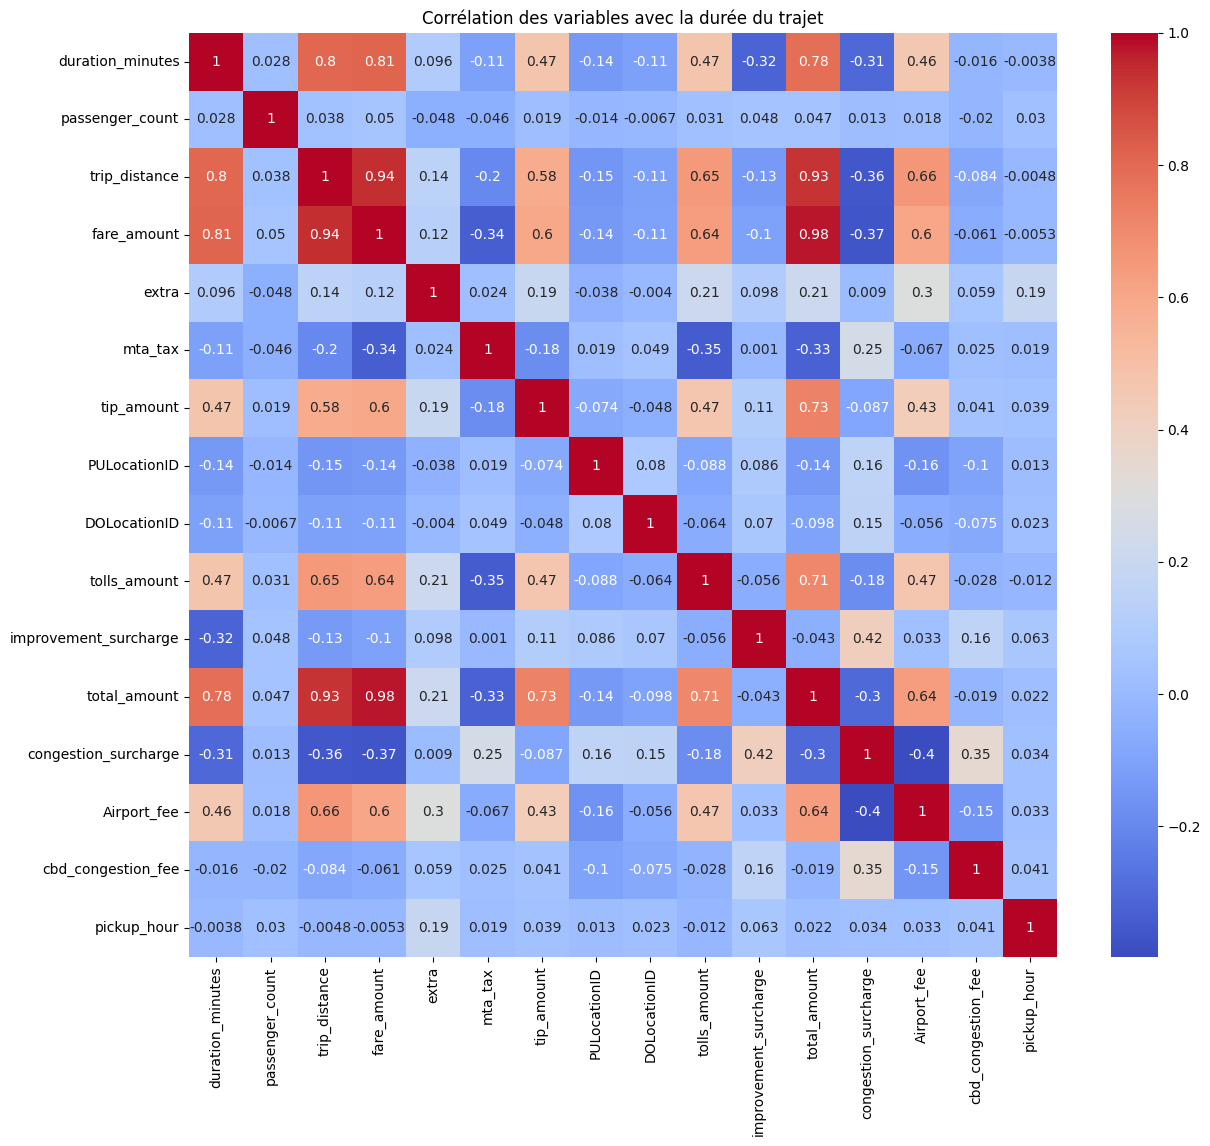

In [15]:
# matrice de correlation

import seaborn as sns
import matplotlib.pyplot as plt

col_num = [
    "duration_minutes",
    "passenger_count",
    "trip_distance",
    "fare_amount",
    "extra",
    "mta_tax",
    "tip_amount",
    "PULocationID",
    "DOLocationID",
    "tolls_amount",
    "improvement_surcharge",
    "total_amount",
    "congestion_surcharge",
    "Airport_fee",
    "cbd_congestion_fee"
]
num_cols = col_num + ["pickup_hour"]
sampled_df = df.select(num_cols).sample(False, 0.1).toPandas()


plt.figure(figsize=(14,12))
corr = sampled_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Corrélation des variables avec la durée du trajet")
plt.show()


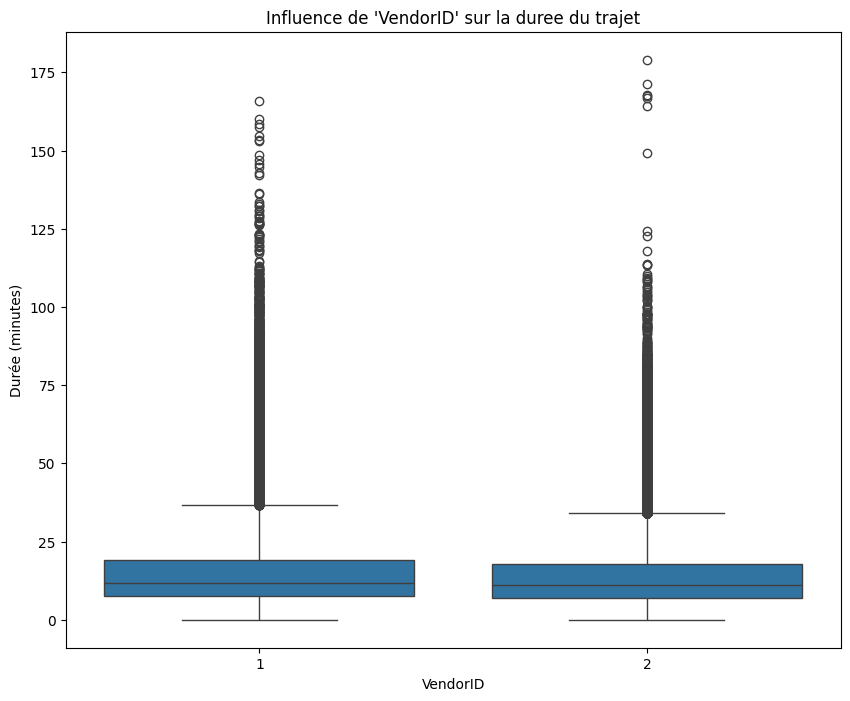

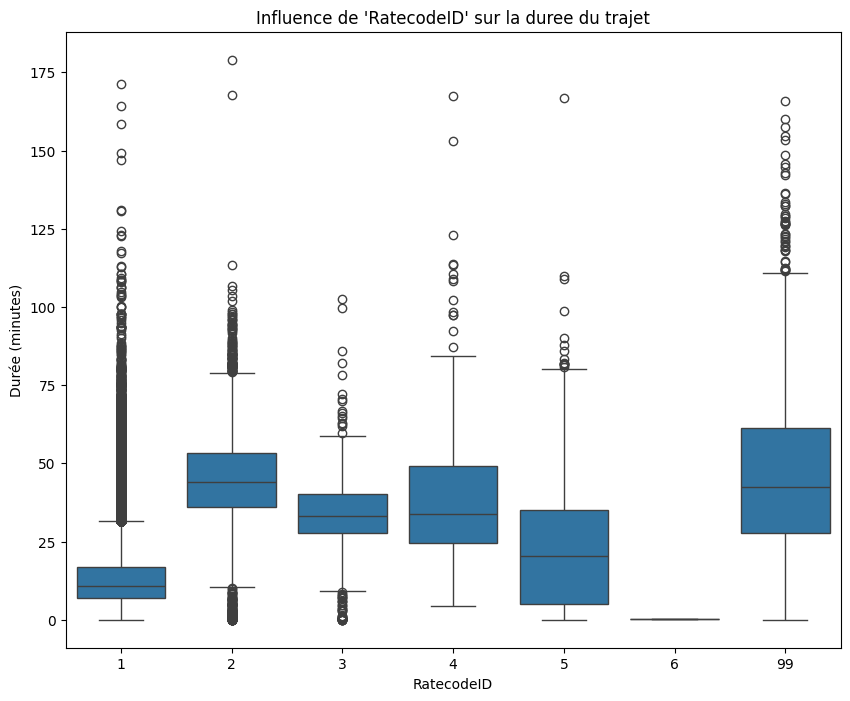

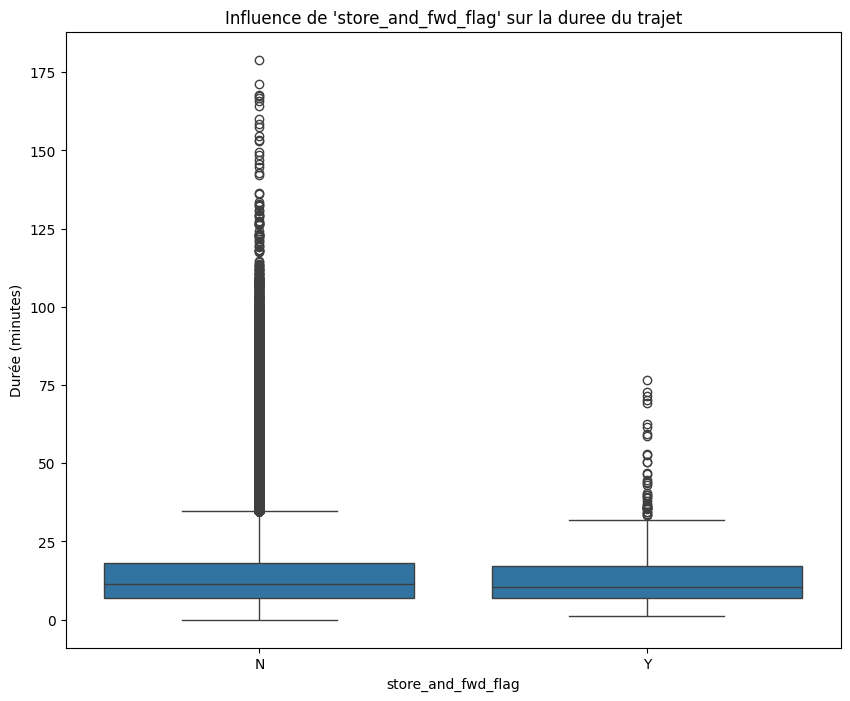

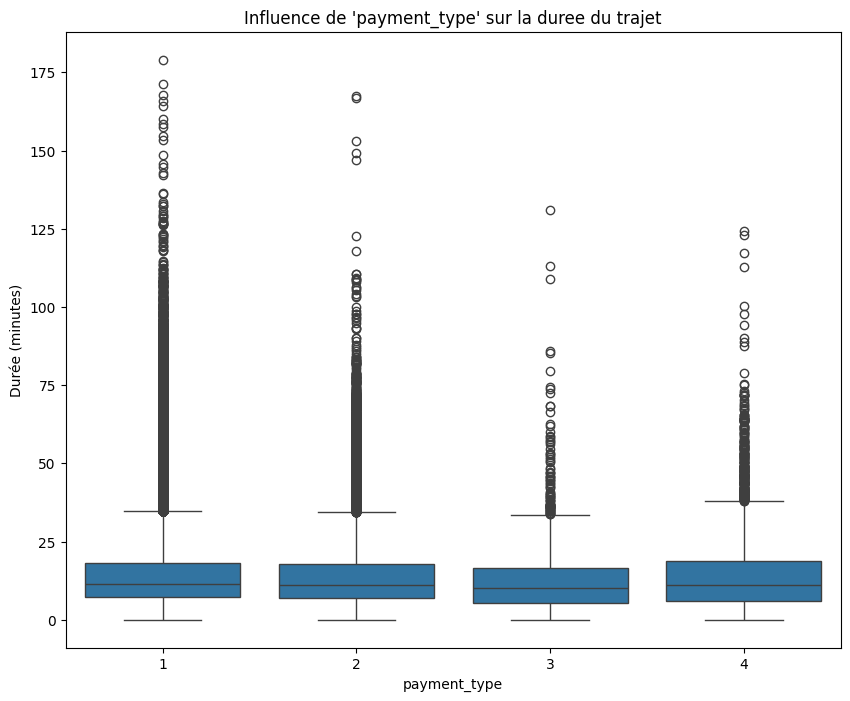

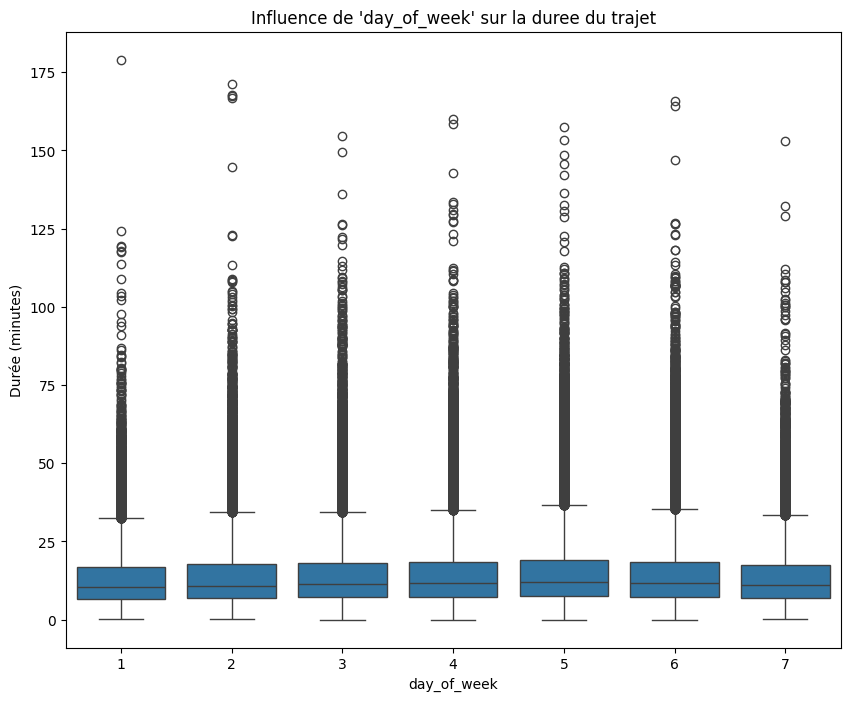

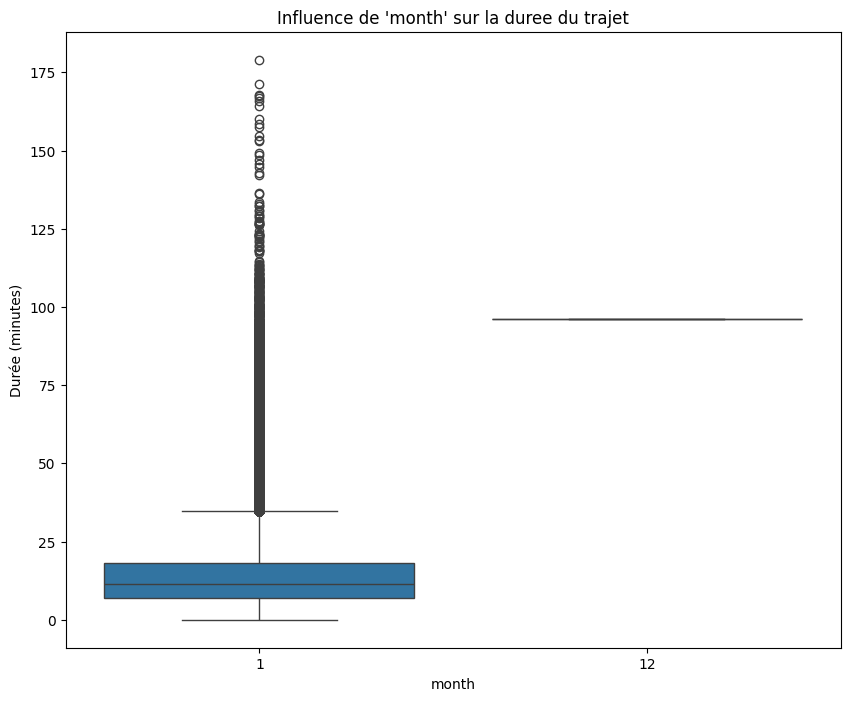

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = [
    "VendorID",
    "RatecodeID",
    "store_and_fwd_flag",
    "payment_type",
    "day_of_week",
    "month"
]

sampled_df = df.select(cat_cols + ["duration_minutes"]).sample(False, 0.1) .toPandas()

for var in cat_cols:
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=sampled_df, x=var, y="duration_minutes")
    plt.title(f"Influence de '{var}' sur la duree du trajet")
    plt.xlabel(var)
    plt.ylabel("Durée (minutes)")
    plt.show()

In [17]:
# Filtrer le nombre de passagers
df = df.filter(f.col("RatecodeID") <= 5)

In [18]:
df = df.drop("VendorID", "tpep_pickup_datetime", "store_and_fwd_flag" , "tpep_dropoff_datetime", "passenger_count", "extra", "mta_tax",
               "improvement_surcharge", "congestion_surcharge", "cbd_congestion_fee")

print(df.columns)
num_cols= [ 'trip_distance',
            'fare_amount',
            'total_amount',
            'tip_amount',
            'Airport_fee',
            'tolls_amount',
            'day_of_week',
            "payment_type"
          ]

['trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'Airport_fee', 'duration_minutes', 'duration_log', 'pickup_hour', 'day_of_week', 'month']


# Modilisation

In [19]:
from pipeline import split_data, model_pipeline, metric_model

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.regression import LinearRegression


In [20]:
# pipeline linear regression
train_df, test_df = split_data(df, target="duration_minutes")

pipeline_LR = model_pipeline(num_cols, LinearRegression())


In [21]:
#  entrainement du model de linear regresion
model_LR = pipeline_LR.fit(train_df)


26/01/12 11:15:16 WARN Instrumentation: [eeecfcc2] regParam is zero, which might cause numerical instability and overfitting.
26/01/12 11:15:19 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
26/01/12 11:15:22 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [22]:
#  metrics de linear regresion
y_pred_LR = model_LR.transform(test_df)

mae, rmse, r2 = metric_model(y_pred_LR)

print("mae", mae)
print("rmse", rmse)
print("r2_score", r2)

mae 4.088071433509109
rmse 5.908693299193152
r2_score 0.6991591328513034


In [23]:
# pipeline random forest
train_df, test_df = split_data(df, target="duration_minutes")

pipeline_RF = model_pipeline(num_cols, RandomForestRegressor(numTrees=100))

In [24]:
#  entrainement du model de random forest
model_RF = pipeline_RF.fit(train_df)


26/01/12 11:16:01 WARN MemoryStore: Not enough space to cache rdd_181_8 in memory! (computed 11.8 MiB so far)
26/01/12 11:16:01 WARN BlockManager: Persisting block rdd_181_8 to disk instead.
26/01/12 11:16:05 WARN MemoryStore: Not enough space to cache rdd_181_1 in memory! (computed 94.7 MiB so far)
26/01/12 11:16:05 WARN BlockManager: Persisting block rdd_181_1 to disk instead.
26/01/12 11:16:09 WARN MemoryStore: Not enough space to cache rdd_181_5 in memory! (computed 226.4 MiB so far)
26/01/12 11:16:09 WARN BlockManager: Persisting block rdd_181_5 to disk instead.
26/01/12 11:16:16 WARN MemoryStore: Not enough space to cache rdd_181_5 in memory! (computed 62.9 MiB so far)
26/01/12 11:16:16 WARN MemoryStore: Not enough space to cache rdd_181_1 in memory! (computed 41.9 MiB so far)
26/01/12 11:16:24 WARN MemoryStore: Not enough space to cache rdd_181_1 in memory! (computed 41.9 MiB so far)
26/01/12 11:16:24 WARN MemoryStore: Not enough space to cache rdd_181_5 in memory! (computed 62.

In [25]:
#  metrics de random forest
y_pred_RF = model_RF.transform(test_df)

mae, rmse, r2 = metric_model(y_pred_RF)

print("mae", mae)
print("rmse", rmse)
print("r2_score", r2)

mae 2.226792019943368
rmse 4.193870846507681
r2_score 0.8484401942115221
